In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np

### Loading and Cleaning Data

In [3]:
file = pd.read_csv('SPX.csv')
nul_vals = file[['Date', 'Open', 'Close']].isnull().any()
print(f'Empty Fields ? \n{nul_vals}')

Empty Fields ? 
Date     False
Open     False
Close    False
dtype: bool


### Closing Price Plot

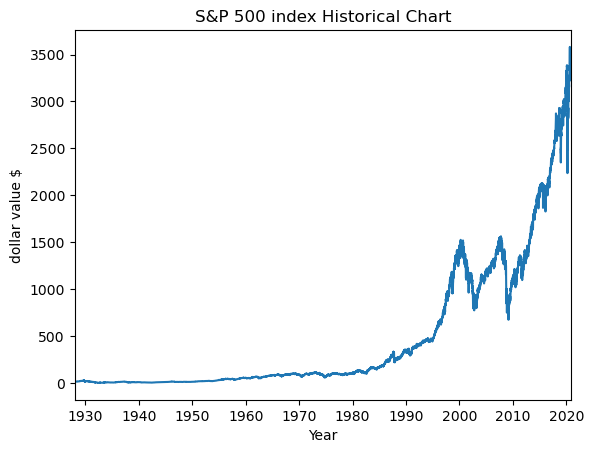

In [5]:
dates = pd.to_datetime(file['Date']).tolist()
closing_prince_list = file['Close'].tolist()
plt.plot(dates,file['Close'])
plt.ylabel('dollar value $')
plt.xlabel('Year')
plt.title('S&P 500 index Historical Chart')
start_time = datetime(1927, 12, 30)
end_time = datetime(2020, 11, 4)
plt.xlim(start_time, end_time)
plt.show()

### Daily Returns

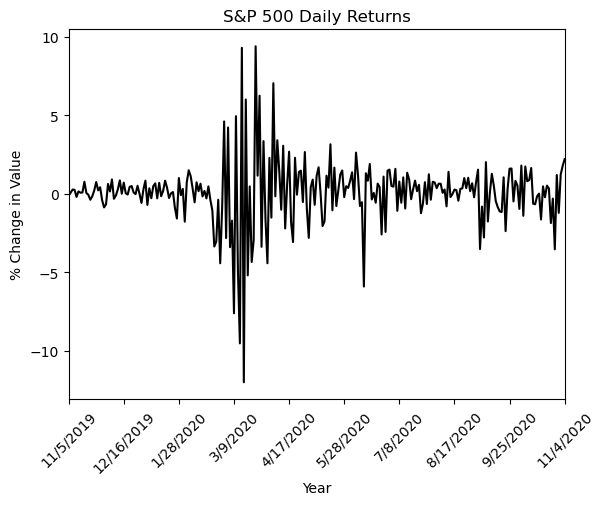

In [7]:
data_for_daily_return = file[23069:23323]
daily_return = []
closing_price = data_for_daily_return['Close']
date = data_for_daily_return['Date'].tolist()
date.pop(0)
#need to remove date one since the formula being used compares current day's close with previous days close to calculate daily return

for i in range(23069, 23322, 1): # 0 here will be the first row that contains data 23322 last one that contains data 23324
    daily_return.append(((closing_prince_list[i+1] - closing_prince_list[i])/closing_prince_list[i])*100)


plt.plot(date,daily_return, color='black')
#plt.plot(data_for_daily_return['Date'], closing_price)
plt.xlim([date[0], date[-1]])
num_ticks = 10
tick_indices = np.linspace(0, len(date) - 1, num_ticks, dtype=int)
tick_labels = []
for i in tick_indices:
    tick_labels.append(date[i])  # Add the corresponding date at each tick index
# Set the tick positions and labels
plt.xticks(tick_indices, tick_labels, rotation=45)
plt.ylabel('% Change in Value')
plt.xlabel('Year')
plt.title('S&P 500 Daily Returns')
plt.show()

Simple Moving Average =
23303    3349.070508
23304    3355.879004
23305    3363.413001
23306    3368.949500
23307    3374.108496
23308    3380.425000
23309    3388.642005
23310    3395.934998
23311    3402.312500
23312    3412.244507
23313    3422.589502
23314    3430.935999
23315    3433.404492
23316    3436.164990
23317    3431.566492
23318    3428.031995
23319    3424.108997
23320    3419.190991
23321    3419.600488
23322    3420.800488
Name: Close, dtype: float64


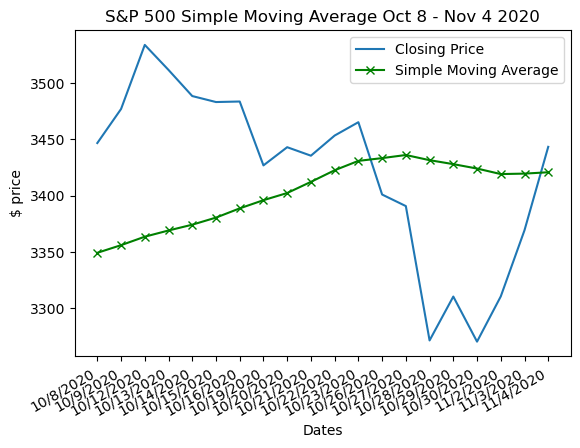

In [16]:
data_for_sma = file[23284:23323]
data_for_close= file[23303:23323]
date_for_sma = data_for_close['Date'].tolist()
twenty_day_close = data_for_close['Close'].tolist()
sma = data_for_sma['Close'].rolling(window=20).mean()
print(f'Simple Moving Average =\n{sma[19:]}')
plt.xlabel('Dates')
plt.ylabel('$ price')
plt.title('S&P 500 Simple Moving Average Oct 8 - Nov 4 2020')
plt.plot(date_for_sma, data_for_close['Close'], label="Closing Price")
plt.plot(date_for_sma, sma[19:], color='green', marker='x', label="Simple Moving Average")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

### Exponential Moving Average

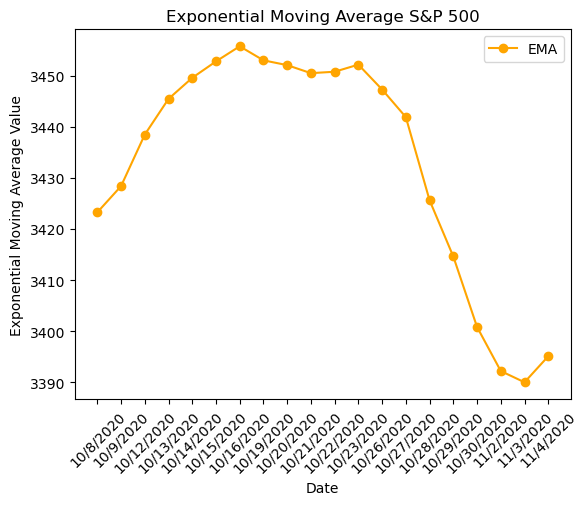

In [10]:
data_for_ema = file[23303:23323]
ema_average = data_for_sma['Close'].sum()/20
test_ema = [3423.27]
sf = 2/(20 + 1)
for i in range(23304, 23323, 1):
    test_ema.append((file['Close'][i] * sf) + (test_ema[i-23304]*(1-sf)))
test_ema_list = [round(float(x), 2) for x in test_ema]

plt.plot(date_for_sma,test_ema_list, label="EMA", marker='o', color="orange")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Exponential Moving Average Value')
plt.title('Exponential Moving Average S&P 500')
plt.xticks(rotation=45)

plt.show()

### Exponential Moving Average with Closing Price

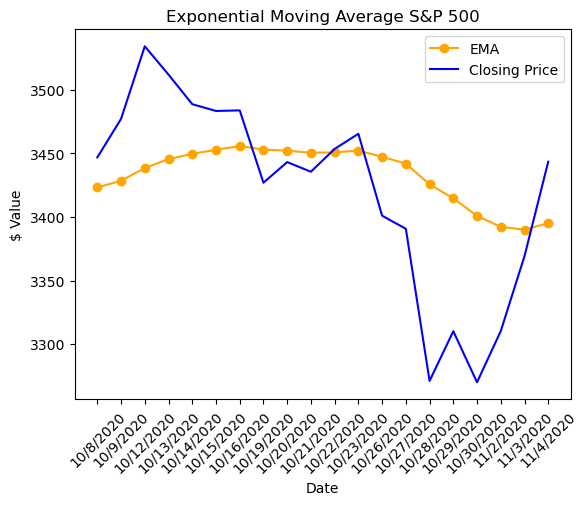

In [12]:
data_for_ema = file[23303:23323]
ema_average = data_for_sma['Close'].sum()/20
test_ema = [3423.27]
sf = 2/(20 + 1)
for i in range(23304, 23323, 1):
    test_ema.append((file['Close'][i] * sf) + (test_ema[i-23304]*(1-sf)))
test_ema_list = [round(float(x), 2) for x in test_ema]

plt.plot(date_for_sma,test_ema_list, label="EMA", marker='o', color='orange')
plt.plot(date_for_sma, data_for_close['Close'], label="Closing Price",color='blue')
plt.xlabel('Date')
plt.ylabel('$ Value')
plt.title('Exponential Moving Average S&P 500')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Buy and Sell Signal Based on EMA

EMA indicator:
['buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'sell', 'sell', 'sell', 'buy', 'buy', 'sell', 'sell', 'sell', 'sell', 'sell', 'sell', 'sell', 'buy']


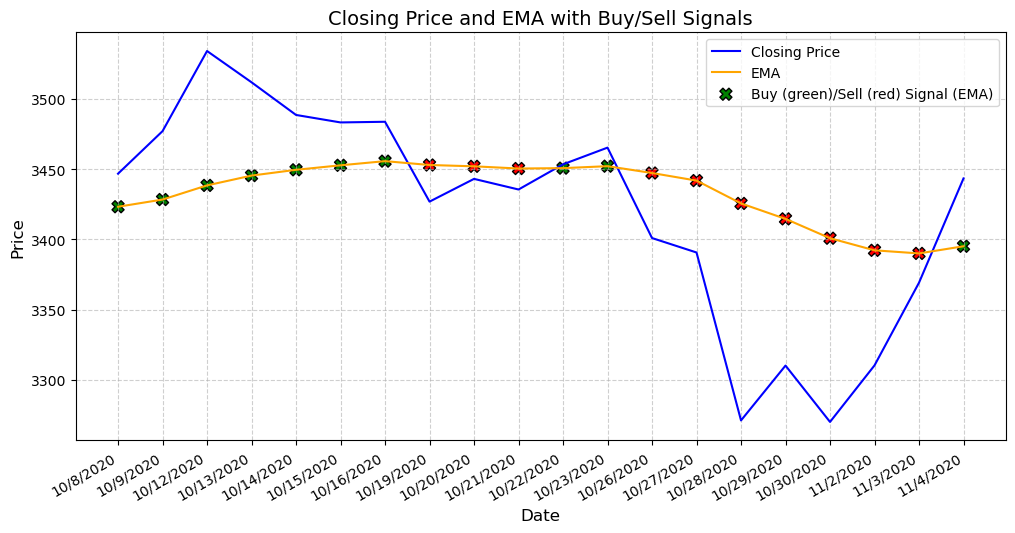

In [18]:
indicator2 = []
for j in range(0,len(twenty_day_close),1):
    if twenty_day_close[j] > test_ema_list[j]:
        indicator2.append('buy')
    elif twenty_day_close[j] == test_ema_list[j]:
        indicator2.append('intersection')
    else:
        indicator2.append('sell')
print(f'EMA indicator:\n{indicator2}')

marker_colors_EMA = []
for i in indicator2:
    if i == "buy":
        marker_colors_EMA.append("green")
    else:
        marker_colors_EMA.append("red")

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date_for_sma, data_for_close['Close'], label="Closing Price", color="blue")
ax.plot(date_for_sma, test_ema_list, label="EMA", color="orange")
ax.scatter(date_for_sma, test_ema_list, c=marker_colors_EMA, marker="X", label="Buy (green)/Sell (red) Signal (EMA)", edgecolors="black", s=75)
ax.set_ylabel("Price", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_title("Closing Price and EMA with Buy/Sell Signals", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.6)
ax.legend(loc="upper right", fontsize=10)
plt.gcf().autofmt_xdate()
plt.show()